# **IMPARTANT NOTE**

1. In the file name of this note book "`CENG3530-Spring2023-MidermProject- STUDENTNO-NAME.ipynb`" <br> replace **your student no** with "`STUDENTNO`" <br>and **your full name** with "`NAME`".<br> e.g. `CENG3530-Spring2023-MidermProject-000000001-BekirTanerDincer.ipynb`

# Project Subject & Objectives 

**Subject**

> Implementation of the BSB Indexer for an IR system

**Objective**:

> The objective of this homework is to implement an indexer for an information retrieval system in Python. You will be required to implement four classes, including `Index`, `Documents`, `Lexicon`, and `CollectionStatistics`. The implementation of `Index` class will use the **Block Sort-Based Indexing** algorithm to create an inverted index for a given collection with collection path. The resulting index will then be stored in an index file path given as input. The implementation will also include methods for loading and storing all of the classes, `Documents`, `Lexicon`, and `CollectionStatistics`.

> **Dataset** for this project is **Milliyet100K** and the neccessary code cells that load the dataset is given below under the topic "DATASET".

# **DATASET**

> **`MilliyetCollection100K.zip`**

> This is the collection we used for the test of your implementation.

> It contains **100K documents**, and apprx. it has apprx. **25 million tokens**, i.e. 95.5/4.

## Load Milliyet collection 100K & extract

> File ID for `gdown`<br>
1-X0kWT2NCc4VOI0v1ErkWWbFq9oIJtgs


In [ ]:
!gdown 1-X0kWT2NCc4VOI0v1ErkWWbFq9oIJtgs

Downloading...
From: https://drive.google.com/uc?id=1-X0kWT2NCc4VOI0v1ErkWWbFq9oIJtgs
To: /content/MilliyetCollection100k.zip
100% 64.3M/64.3M [00:00<00:00, 183MB/s]


In [ ]:
!unzip /content/MilliyetCollection100k.zip -d /content

## Install Zstandard library
The files in the collection directory is compressed using the **Zstandard** compression algorithm.

https://facebook.github.io/zstd/

In [ ]:
!pip install zstandard

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 38.4 MB/s eta 0:00:00


## Mount your google drive

To have **persistent storage for the index** we'll create we need our own google drive to be mounted to the active runtime that the current jupyter notebook is backed by.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Create an `index` directory in your drive to have persistent indices

`index_path = "/content/drive/MyDrive/index/milliyet"`


## The format of the documents in compressed files



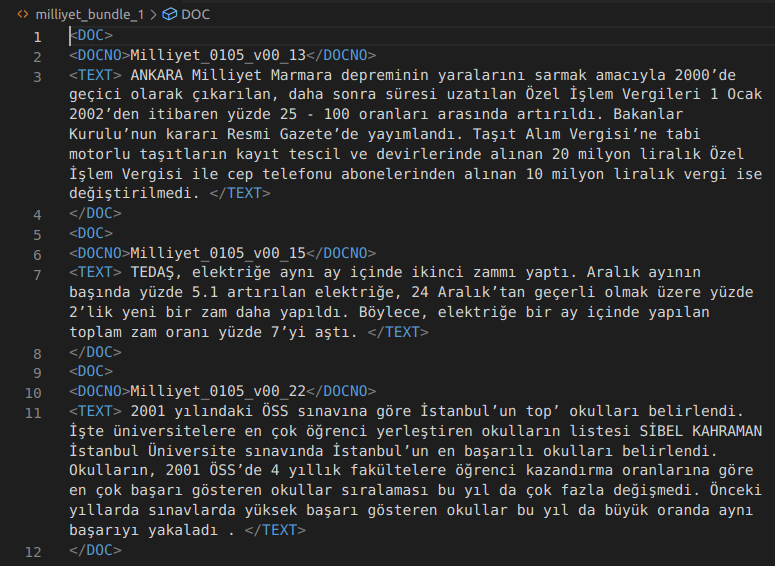

## Example Parse of the content of a zst compressed file

In [ ]:
from bs4 import BeautifulSoup

content = '''
<DOC>
<DOCID>Milliyet_0105_v00_13</DOCID>
<TEXT> ANKARA Milliyet Marmara depreminin yaralarını sarmak amacıyla 2000’de 
geçici olarak çıkarılan, daha sonra süresi uzatılan Özel İşlem Vergileri 
1 Ocak 2002’den itibaren yüzde 25 - 100 oranları arasında artırıldı. 
Bakanlar Kurulu’nun kararı Resmi Gazete’de yayımlandı. Taşıt Alım Vergisi’ne 
tabi motorlu taşıtların kayıt tescil ve devirlerinde alınan 20 milyon liralık 
Özel İşlem Vergisi ile cep telefonu abonelerinden alınan 10 milyon liralık 
vergi ise değiştirilmedi. </TEXT>
</DOC>
<DOC>
<DOCID>Milliyet_0105_v00_15</DOCID>
<TEXT> TEDAŞ, elektriğe aynı ay içinde ikinci zammı yaptı. Aralık ayının başında
 yüzde 5.1 artırılan elektriğe, 24 Aralık’tan geçerli olmak üzere yüzde 2’lik 
 yeni bir zam daha yapıldı. Böylece, elektriğe bir ay içinde yapılan 
 toplam zam oranı yüzde 7’yi aştı. </TEXT>
</DOC>
<DOC>
<DOCID>Milliyet_0105_v00_22</DOCID>
<TEXT> 2001 yılındaki ÖSS sınavına göre İstanbul’un top’ okulları belirlendi. 
İşte üniversitelere en çok öğrenci yerleştiren okulların listesi SİBEL KAHRAMAN 
İstanbul Üniversite sınavında İstanbul’un en başarılı okulları belirlendi. 
Okulların, 2001 ÖSS’de 4 yıllık fakültelere öğrenci kazandırma oranlarına göre 
en çok başarı gösteren okullar sıralaması bu yıl da çok fazla değişmedi. 
Önceki yıllarda sınavlarda yüksek başarı gösteren okullar bu yıl da büyük 
oranda aynı başarıyı yakaladı . </TEXT>
</DOC>
'''
soup = BeautifulSoup(content, 'html.parser')
docs = soup.find_all('doc')
for doc in docs:
    docID = doc.find('docid').text
    text = doc.find('text').text.strip()
    print('DOCID:', docID)
    print('TEXT:', text)


# **STARTER CODE**

Use the templates given below for `Index`, `Documents`, `Lexicon`, and `CollectionStatistics` classes. 

## `CollectionStats` class

> **Implement the appropirate methods** for the `CollectionStats` class, so that the statistics returned by the corresponding methods that are already implemented returns the correct values.

> Implement the two methods, one of which writes the stats to file, and the other one of which loads the stats previously written.

In [2]:
class CollectionStats:

  def __init__(self):
    self.N = 0
    self.TF = 0
    self.M = 0
    self.L = 0
    self.C = 0

  # Updates statistics for the input document
  def addDocument(self, document):
    # Implement this method
    pass
  
  def numberOfDocuments(self):
    return self.N

  # Size of the collection
  def numberOfTokens(self):
    return self.TF
  
  # Dictionary Size
  def numberOfTerms(self):
    return self.M

  # Avg. # of tokens per document
  def averageTokensPerDoc(self):
    return self.L

  # Avg. # of chars per token
  def averageCharsPerToken(self):
    return self.C

  # Collection Stats writer function
  def write(self,index_path):
    # Implement this method
    pass

  # Collection Stats loader function
  def load(self,index_path):
    # Implement this method
    pass

## `Lexicon` Class

> Implement the `Lexicon` class for **Term Dictionary**

> This Lexicon class, for each unique term in the collection, stores 
1. An integer valued index for the term
2. The Document Frequency (DF) for the term<br>

That is, it stores $<\text{term: (idx, DF)}>$ pairs.

In [ ]:
class Lexicon:

  def __init__(self):
    # Implement this method
    self.lexicon = None;

  # add the token to the dictionary
  def addToken(self, token):
    # Implement this method
    pass 

  # returns the number of terms in the dictionary    
  def size(self):
    # Implement this method
    pass 

  # Document Frequency of the input term
  def getDF(self, term):
    # Implement this method
    pass 

  # Returns total DF over all terms
  def getTotalDF(self):
    # Implement this method
    pass 

  # Returns the index of the term in the lexion
  def getIdx(self, term):
    # Implement this method
    pass 

  # Returns the term for the given index idx
  def getTerm(self, idx):
    # Implement this method
    pass 

  # Lexicon writer function
  def write(self, index_path):
    # Implement this method
    pass 

  # Lexicon loader function
  def load(self, index_path):
    # Implement this method
    pass 


## `Documents` Class

> Similar to the `Lexicon` class, `Document` Class, stores, for each of the document in the collection:
1. An integer valued index for the document
2. Lenght of the document in terms of tokens, i.e. Document Size

That is, it stores $<\text{document: (idx, length)}>$ pairs.

In [ ]:
class Documents:

  def __init__(self):
    # Implement this method
    self.documents = None;

  def addDocument(self, document):
    # Implement this method
    pass 

  # Returns the index of the document
  def getIdx(self, document):
    # Implement this method
    pass 

  # Returns the name of document for the given index idx
  def getDocument(self, idx):
    # Implement this method
    pass 

  # Documents writer function
  def write(self, index_path):
    # Implement this method
    pass 

  # Documents loader function
  def load(self, index_path):
    # Implement this method
    pass 


## `Index` Class

> This class implements BSB indexer.

In [1]:
class Index:

  def __init__(self, index_path):
    self.index_path = index_path
    
    self.lexicon = Lexicon()
    self.documents = Documents()
    self.collectionStats = CollectionStats()

    self.invertedIndex = None;

  def create(self, collection_path):
    # Create Inverted Index using BSB Indexing

    # After index is created
    self.collectionStats.write(self.index_path)
    self.lexicon.write(self.index_path)
    self.document.write(self.index_path)

  # Loads the inverted index from self.index_path
  def load(self):
    # Implement the loading of the inverted index from index_path

    # After the inverted index is loaded
    self.collectionStats.load(self.index_path)
    self.lexicon.load(self.index_path)
    self.documents.load(self.index_path)


# **TEST**

## Index creation

In [ ]:
collection_path = "/content/MilliyetCollection100k"
index_path = "/content/drive/MyDrive/index/milliyet100K"

milliyet_index = Index(index_path)

milliyet_index.create();

collectionStats = milliyet_index.collectionStats
lexicon = milliyet_index.lexicon

# Print collection statistics
N  = collectionStats.numberOfDocuments() # Number of documents
L  = collectionStats.averageTokensPerDoc() # Average # of tokens per document
C  = collectionStats.averageCharsPerToken() # Average # of chars per token

M  = lexicon.size() # Total # of terms, size of term dictionary
NPP = lexicon.totalDF() # "Total DF" over all terms

print("\nCollection Statistics")
print(f"\nN\t{N}\nL\t{L}\nC\t{C}\nM\t{M}\nTF\t{TF}\nNPP\t{NPP}")

## Index Loading

In [ ]:
index_path = "/content/drive/MyDrive/index/milliyet100K"

milliyet_index = Index(index_path)

milliyet_index.load();

collectionStats = milliyet_index.collectionStats
lexicon = milliyet_index.lexicon

# Print collection statistics
N  = collectionStats.numberOfDocuments() # Number of documents
L  = collectionStats.averageTokensPerDoc() # Average # of tokens per document
C  = collectionStats.averageCharsPerToken() # Average # of chars per token

M  = lexicon.size() # Total # of terms, size of term dictionary
NPP = lexicon.totalDF() # "Total DF" over all terms

print("\nCollection Statistics")
print(f"\nN\t{N}\nL\t{L}\nC\t{C}\nM\t{M}\nTF\t{TF}\nNPP\t{NPP}")